Import libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

Read source data.

In [ ]:
url = "https://github.com/nug-12/Forage_JPMorgan_Chase_Co_Job_Simulation_Quantitative_Research/raw/refs/heads/main/Nat_Gas2.csv"

df = pd.read_csv(url)
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [ ]:
df.tail()

,Dates,Prices
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6
46,8/31/24,11.5
47,9/30/24,11.8


Convert date column to date type.

In [ ]:
df["Dates"] = pd.to_datetime(df["Dates"], format='%m/%d/%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   48 non-null     datetime64[ns]
 1   Prices  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


Visualize data.

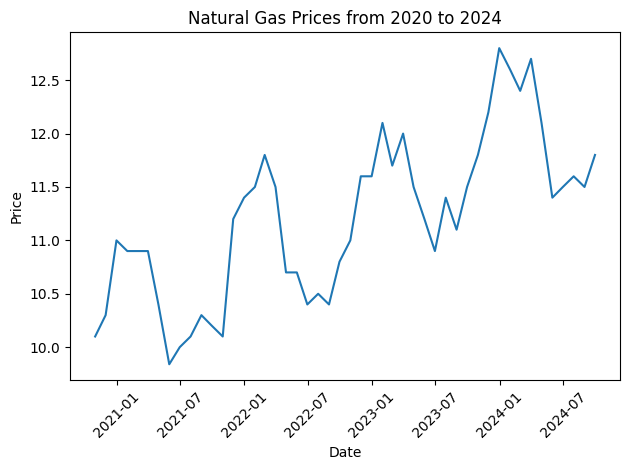

In [ ]:
sns.lineplot(df, x='Dates', y='Prices')
plt.title("Natural Gas Prices from 2020 to 2024")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Obtain seasonal decomposition to understand the data better.

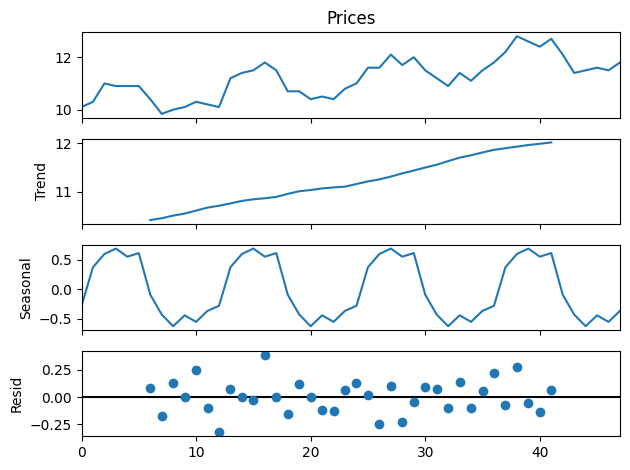

In [ ]:
seasonality = seasonal_decompose(df['Prices'], model='additive', period=12)
seasonality.plot()
plt.show()

In [ ]:
model = SARIMAX(df['Prices'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_fit = model.fit(disp=False)
print(sarima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             Prices   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   1.581
Date:                            Wed, 11 Dec 2024   AIC                              6.838
Time:                                    10:12:33   BIC                             12.061
Sample:                                         0   HQIC                             7.972
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4532      0.301     -1.505      0.132      -1.044       0.137
ma.L1         -0.5152      0.344   

Forecast 12 months into the future.

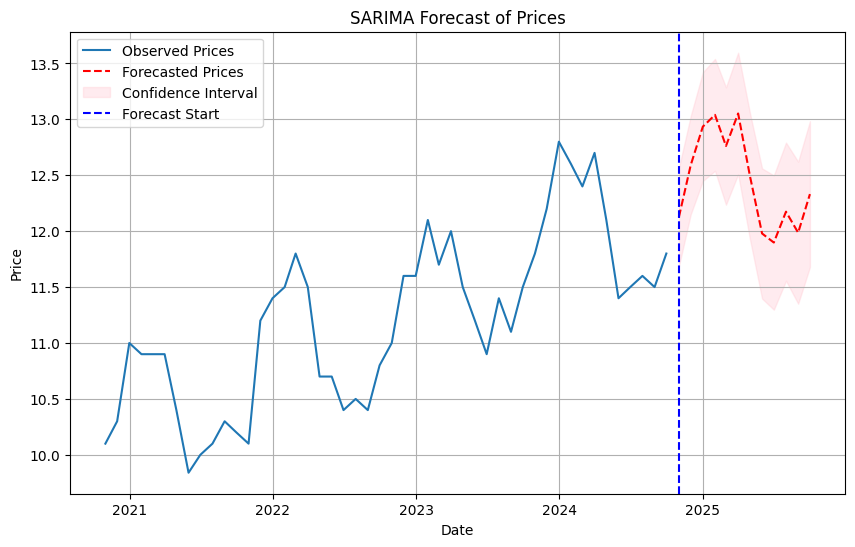

In [ ]:
df.set_index('Dates', inplace=True)

forecast_steps = 12
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2024-10-31', end='2025-10-31', freq='MS')

forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


plt.figure(figsize=(10, 6))
plt.plot(df['Prices'], label='Observed Prices')
plt.plot(forecast_index, forecast_mean, label='Forecasted Prices', linestyle='--', color='red')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.axvline(x=pd.Timestamp('2024-10-31'), color='blue', linestyle='--', label='Forecast Start')
plt.title('SARIMA Forecast of Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()